In [30]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
import pandas as pd
from sklearn.datasets import make_regression

## Генерация данных лийненой регрессии

In [44]:
np.random.seed(0)
X, y = make_regression(n_samples=10000, n_features=10, noise=10)
X = np.hstack([np.ones((X.shape[0], 1)), X])

In [45]:
X.shape

(10000, 11)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Ordinary Least Squares $$ \theta = (X^T X)^{-1} X^T y $$



Используем регуляризацию Риджа, чтобы избежать overfitting'a при обучении

Ridge regularization $$ \theta_{\text{ridge}} = \arg \min_{\theta} \left\{ \| X \theta - y \|^2 + \alpha \| \theta \|^2 \right\} $$


In [50]:
alpha = 0.1 # параметр регуляризации

def ridge_regression(X, y, alpha):
    n_features = X.shape[1]
    # Compute theta using the ridge regression formula
    theta = np.linalg.inv(X.T @ X + alpha * np.identity(n_features)) @ X.T @ y
    return theta


Coefficients using Ridge regression:
[ 0.1236345  19.91237048 91.07673516 39.00892133 19.49163304 22.87112602
 79.33953423 22.95599924 14.35020928 85.92111002  8.88057817]


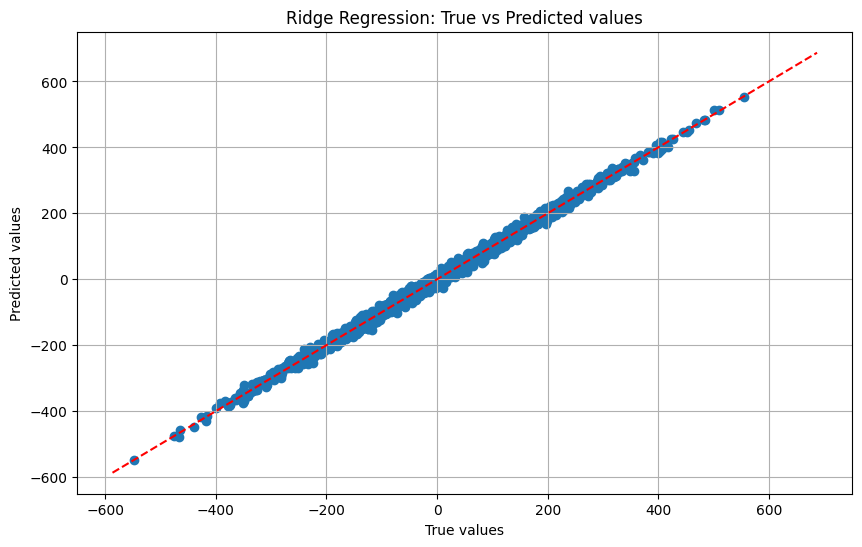

In [51]:
theta_ridge = ridge_regression(X_train, y_train, alpha)

print("Coefficients using Ridge regression:")
print(theta_ridge)

y_pred_ridge = X_test @ theta_ridge

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge)
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Ridge Regression: True vs Predicted values')
plt.grid()
plt.show()
